# Implementation

In [20]:
from tensorflow.keras.datasets import mnist
import numpy as np
from statistics import mode

In [21]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [22]:
X_train_reshape = X_train.reshape(60000, 28*28)
print(X_train_reshape.shape)

X_test_reshape = X_test.reshape(10000, 28*28)
print(X_test_reshape.shape)

(60000, 784)
(10000, 784)


In [23]:
imagesClasses = [(X_train_reshape, y_train) for i in range(len(y_train)-1)]

In [24]:
def euclidean_dist(set1, set2):
    dist = 0
    for i in range(0, len(set1)-1):
        dist += np.sqrt((set1[i] - set2)**2)
    return dist

In [25]:
def nearest_neighbors(k, smallestDists):
    smallestDists = np.array(smallestDists)
    sortedSmallestDists = np.argsort(smallestDists)
    smallestDists[sortedSmallestDists]
    k_smallestDists = []
    for i in range(0, (k-1)):
        k_smallestDists.append(smallestDists[i])
    return k_smallestDists

In [26]:
def queryImagePredictedClass(k, sortedSmallestDist):
    smallestDistClasses = []
    for i in range(len(sortedSmallestDist)-1):
        smallestDistClasses.append(sortedSmallestDist[i])
    mostFrequentClass = mode(smallestDistClasses)
    return mostFrequentClass

In [27]:
#distances between training images and a random query image from testing set
distsTuple = [(euclidean_dist(X_train_reshape[i], X_test_reshape[1]), i+1) for i in range(len(X_train_reshape))]

#nearest neighbors to query image
dists = [distsTuple[i][0] for i in range(len(distsTuple)-1)]
nearestNeighbors = nearest_neighbors(5, dists) # selecting k=5, odd no of nodes
print(nearestNeighbors)


MemoryError: Unable to allocate 68.7 GiB for an array with shape (59999, 784, 784) and data type float16

# Explanation

# Loading dataset

In [12]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.neighbors as NearestNeighbors 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_train.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (60000,)


In [4]:
# X_train_resize = np.resize(X_train, (60000, 28*28))
# print(X_train_resize.shape)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
y_train[0]

5

# Pre-processing 

In [16]:
X_train_reshape = X_train.reshape(60000, 28*28)
print(X_train_reshape.shape)

(60000, 784)


In [17]:
X_test_reshape = X_test.reshape(10000, 28*28)
print(X_test_reshape.shape)

(10000, 784)


Text(0.5, 1.0, '5')

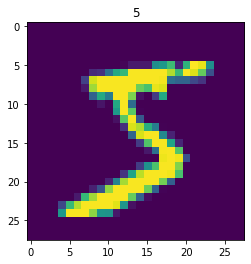

In [6]:
plt.imshow(X_train[0])
plt.title(y_train[0])

Text(0.5, 1.0, '7')

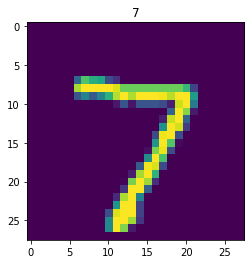

In [7]:
plt.imshow(X_test[0])
plt.title(y_test[0])

In [29]:
X_train_reshape[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

<AxesSubplot:>

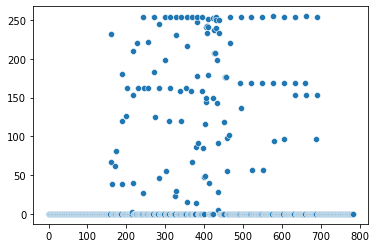

In [25]:
sns.scatterplot(X_train_reshape[2])

# Model fitting and prediction

In [8]:
k = 3 #gives best accuracy (check code in 'Rough space' block below for how I've found that out)
w_nearestNeighs = NearestNeighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto', 
                                                      p=2, metric='minkowski')
w_fitted_modelKNN = w_nearestNeighs.fit(X_train_reshape, y_train)
print(w_fitted_modelKNN)

w_prediction_KNN = w_nearestNeighs.predict(X_train_reshape)
print(w_prediction_KNN)

w_score_KNN = w_nearestNeighs.score(X_test_reshape, y_test)
print("Score: "+str(w_score_KNN))

KNeighborsClassifier(n_neighbors=3, weights='distance')
[5 0 4 ... 5 6 8]
Score: 0.9717


# Visualizing results

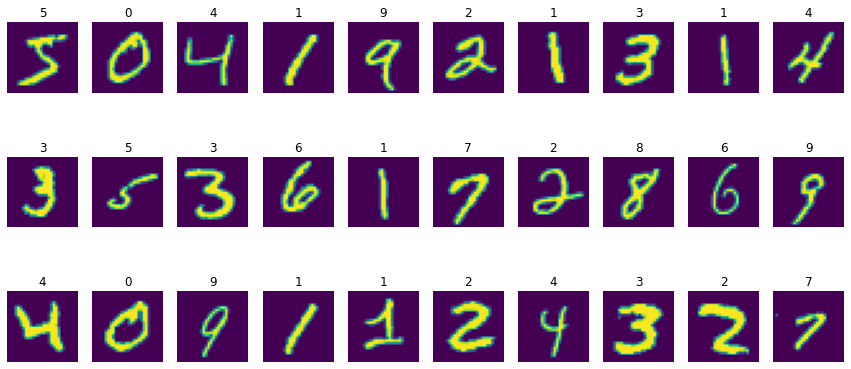

In [10]:
fig = plt.figure(figsize=(15, 7))
rows = 3
columns = 10
for i in range(0, 30):
    fig.add_subplot(rows, columns, (i+1))
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(w_prediction_KNN[i])

# Rough space

Current accuracy updated: 0.9717 with parameters (n_neighbors=3, weights='distance', algorithm='auto', p=2, metric='minkowski')

Progress to get to current accuracy:

In [11]:
k_scores = [] #values of k with euclidean metric
for i in range(1, 31):
    k_nearestNeighs = NearestNeighbors.KNeighborsClassifier(n_neighbors=i, weights='uniform', algorithm='auto', 
                                                      p=2, metric='minkowski')
    k_fitted_modelKNN = k_nearestNeighs.fit(X_train_reshape, y_train)
    print(k_fitted_modelKNN)
    
    k_score_KNN = k_nearestNeighs.score(X_test_reshape, y_test)
    k_scores.append(k_score_KNN)

print(k_scores)

KNeighborsClassifier(n_neighbors=1)
KNeighborsClassifier(n_neighbors=2)
KNeighborsClassifier(n_neighbors=3)
KNeighborsClassifier(n_neighbors=4)
KNeighborsClassifier()
KNeighborsClassifier(n_neighbors=6)
KNeighborsClassifier(n_neighbors=7)
KNeighborsClassifier(n_neighbors=8)
KNeighborsClassifier(n_neighbors=9)
KNeighborsClassifier(n_neighbors=10)
KNeighborsClassifier(n_neighbors=11)
KNeighborsClassifier(n_neighbors=12)
KNeighborsClassifier(n_neighbors=13)
KNeighborsClassifier(n_neighbors=14)
KNeighborsClassifier(n_neighbors=15)
KNeighborsClassifier(n_neighbors=16)
KNeighborsClassifier(n_neighbors=17)
KNeighborsClassifier(n_neighbors=18)
KNeighborsClassifier(n_neighbors=19)
KNeighborsClassifier(n_neighbors=20)
KNeighborsClassifier(n_neighbors=21)
KNeighborsClassifier(n_neighbors=22)
KNeighborsClassifier(n_neighbors=23)
KNeighborsClassifier(n_neighbors=24)
KNeighborsClassifier(n_neighbors=25)
KNeighborsClassifier(n_neighbors=26)
KNeighborsClassifier(n_neighbors=27)
KNeighborsClassifier(n_

In [16]:
k_scores = [] #various values of k with manhattan metric
for i in range(1, 31):
    k_nearestNeighs = NearestNeighbors.KNeighborsClassifier(n_neighbors=i, weights='uniform', algorithm='auto', 
                                                      p=1, metric='manhattan')
    k_fitted_modelKNN = k_nearestNeighs.fit(X_train_reshape, y_train)
    print(k_fitted_modelKNN)
    
    k_score_KNN = k_nearestNeighs.score(X_test_reshape, y_test)
    k_scores.append(k_score_KNN)

print(k_scores)

KNeighborsClassifier(metric='manhattan', n_neighbors=1, p=1)
KNeighborsClassifier(metric='manhattan', n_neighbors=2, p=1)
KNeighborsClassifier(metric='manhattan', n_neighbors=3, p=1)
KNeighborsClassifier(metric='manhattan', n_neighbors=4, p=1)
KNeighborsClassifier(metric='manhattan', p=1)
KNeighborsClassifier(metric='manhattan', n_neighbors=6, p=1)
KNeighborsClassifier(metric='manhattan', n_neighbors=7, p=1)
KNeighborsClassifier(metric='manhattan', n_neighbors=8, p=1)
KNeighborsClassifier(metric='manhattan', n_neighbors=9, p=1)
KNeighborsClassifier(metric='manhattan', n_neighbors=10, p=1)
KNeighborsClassifier(metric='manhattan', n_neighbors=11, p=1)
KNeighborsClassifier(metric='manhattan', n_neighbors=12, p=1)
KNeighborsClassifier(metric='manhattan', n_neighbors=13, p=1)
KNeighborsClassifier(metric='manhattan', n_neighbors=14, p=1)
KNeighborsClassifier(metric='manhattan', n_neighbors=15, p=1)
KNeighborsClassifier(metric='manhattan', n_neighbors=16, p=1)
KNeighborsClassifier(metric='man

In [42]:
k = 3 
nearestNeighs = NearestNeighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='auto', 
                                                      p=2, metric='minkowski')
fitted_modelKNN = nearestNeighs.fit(X_train_reshape, y_train)
print(fitted_modelKNN)

prediction_KNN = nearestNeighs.predict(X_train_reshape)
print(prediction_KNN)

score_KNN = nearestNeighs.score(X_test_reshape, y_test)
print("Score: "+str(score_KNN))

KNeighborsClassifier(n_neighbors=3)
[5 0 4 ... 5 6 8]
Score: 0.9705


In [37]:
for i in range(5, 11):
    crossValScore = cross_val_score(fitted_modelKNN, X_test_reshape, y_test, cv=i)
    print(f"for cv={i}, mean cross validated score = "+str(np.mean(crossValScore)))

for cv=5, mean cross validated score = 0.9449000000000002
for cv=6, mean cross validated score = 0.9453043965036524
for cv=7, mean cross validated score = 0.9457049439789912
for cv=8, mean cross validated score = 0.9458
for cv=9, mean cross validated score = 0.9474027438715095
for cv=10, mean cross validated score = 0.9472000000000002


In [ ]:
parameters = [{'n_neighbors':[2,3,4,5], 'weights':['uniform','distance'], 
               'algorithm':['ball_tree', 'kd_tree'], 'metric':['euclidean', 'manhattan'], 
               'leaf_size':[15,20,30]}]

Grid = GridSearchCV(NearestNeighbors.KNeighborsClassifier(), parameters, cv=10, refit=True, verbose=3)
Grid.fit(X_train_reshape, y_train)

print("Best estimator: "+str(Grid.best_estimator_))
print("Best parameters: "+str(Grid.best_params_))
print("Score = "+(Grid.best_score_))

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
[CV 1/10] END algorithm=ball_tree, leaf_size=15, metric=euclidean, n_neighbors=2, weights=uniform;, score=0.967 total time= 3.6min
[CV 2/10] END algorithm=ball_tree, leaf_size=15, metric=euclidean, n_neighbors=2, weights=uniform;, score=0.961 total time= 3.6min
[CV 3/10] END algorithm=ball_tree, leaf_size=15, metric=euclidean, n_neighbors=2, weights=uniform;, score=0.962 total time= 3.6min
[CV 4/10] END algorithm=ball_tree, leaf_size=15, metric=euclidean, n_neighbors=2, weights=uniform;, score=0.968 total time= 3.6min
[CV 5/10] END algorithm=ball_tree, leaf_size=15, metric=euclidean, n_neighbors=2, weights=uniform;, score=0.963 total time= 3.6min
[CV 6/10] END algorithm=ball_tree, leaf_size=15, metric=euclidean, n_neighbors=2, weights=uniform;, score=0.963 total time= 3.6min
[CV 7/10] END algorithm=ball_tree, leaf_size=15, metric=euclidean, n_neighbors=2, weights=uniform;, score=0.968 total time= 3.6min
[CV 8/10] END algo

In [54]:
NearestNeighbors.KNeighborsClassifier().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])